# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Lectura de datos

In [2]:
#Lectura de datos
data_train=pd.read_csv("Data\BD_PLS2.csv")
data_train.head()

,Unnamed: 0,ASB.11.1,ASB.11.2,ASB.11.7,ASB.11.8,AGC.1.1,AGC.1.2,AGC.1.3,AGC.1.4,AGC.1.5,...,desempeno_social1F.2.6.3,desempeno_social1F.2.6.4,desempeno_social1F.2.6.5,desempeno_social1F.2.6.6,desempeno_social2F.2.7.1,desempeno_social2F.2.7.2,desempeno_social2F.2.7.3,desempeno_social2F.2.7.4,desempeno_social2F.2.7.5,desempeno_social3
0,0,4.0,4.0,4.0,3.0,3.0,3.0,0.0,3.0,2.0,...,3.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,0
1,1,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,0
2,2,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0
3,3,2.0,3.0,2.0,3.0,1.0,1.0,0.0,1.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,0
4,4,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0


In [3]:
AG = data_train[['AGC.1.2', 'AGC.1.3', 'AGC.1.4', 'AGC.1.5', 'AGC.1.6', 'AGC.1.7', 'AGC.1.8', 'AGC.1.9']].sum(axis=1)
EN = data_train[['EC.3.1.1', 'EC.3.1.2', 'EC.3.1.3', 'EC.3.1.4', 'EC.3.1.5', 'EC.3.1.6']].sum(axis=1)
CH = data_train[['CHD.3.3.1', 'CHD.3.3.6', 'CHD.3.3.7']].sum(axis=1)
CS = data_train[['CSD.5.1.1', 'CSD.5.1.2', 'CSD.5.1.3']].sum(axis=1)
IN = data_train[['ID.4.1.4', 'ID.4.1.5', 'ID.4.1.6', 'ID.4.1.7', 'ID.4.1.8', 'ID.4.1.9','ID.4.1.11']].sum(axis=1)
MF = data_train[['MFD.2.1.1', 'MFD.2.1.2', 'MFD.2.1.3', 'MFD.2.1.4', 'MFD.2.1.5','MFD.2.1.6','MFD.2.1.7','MFD.2.1.8']].sum(axis=1)
DS1 = data_train[['desempeno_social1F.2.6.3', 'desempeno_social1F.2.6.4', 'desempeno_social1F.2.6.5', 'desempeno_social1F.2.6.6']].sum(axis=1)
DS2 = data_train[['desempeno_social2F.2.7.1', 'desempeno_social2F.2.7.2', 'desempeno_social2F.2.7.3', 'desempeno_social2F.2.7.4']].sum(axis=1)
DE= data_train['Desempeno_econo1']

In [4]:
data_dea=pd.concat([AG,EN,CH,CS,IN,MF,DS1,DS2,DE], axis=1)
data_dea.columns = [['AG','EN','CH','CS','IN','MF','DS1','DS2','DE']]

In [33]:
# data_dea.to_csv('BD_DEA.csv')

In [7]:
pd.DataFrame(data_dea.describe())

,AG,EN,CH,CS,IN,MF,DS1,DS2,DE
count,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,18.825000,14.508333,9.05000,9.291667,20.500000,18.541667,12.216667,12.291667,0.442446
std,6.848496,4.704719,0.63312,0.863799,2.675755,7.081632,1.415303,1.324595,1.402836
min,0.000000,3.000000,7.00000,6.000000,7.000000,0.000000,4.000000,4.000000,0.000000
25%,13.000000,11.000000,9.00000,9.000000,21.000000,13.000000,12.000000,12.000000,0.012750
50%,24.000000,18.000000,9.00000,9.000000,21.000000,24.000000,12.000000,12.000000,0.150000
75%,24.000000,18.000000,9.00000,9.000000,21.000000,24.000000,12.000000,12.000000,0.365000
max,26.000000,20.000000,12.00000,12.000000,28.000000,25.000000,16.000000,16.000000,11.500000


In [11]:
val=[ 16, 104]
ind =['Efficients','Inefficients']
df = pd.DataFrame({'DMUs': val}, index=ind)

<AxesSubplot: >

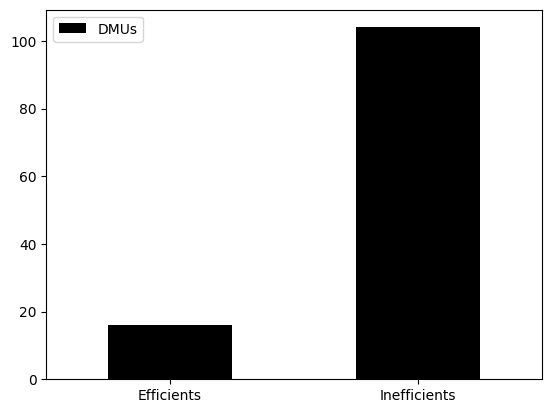

In [13]:
df.plot.bar(rot=0, color='black')

<AxesSubplot: >

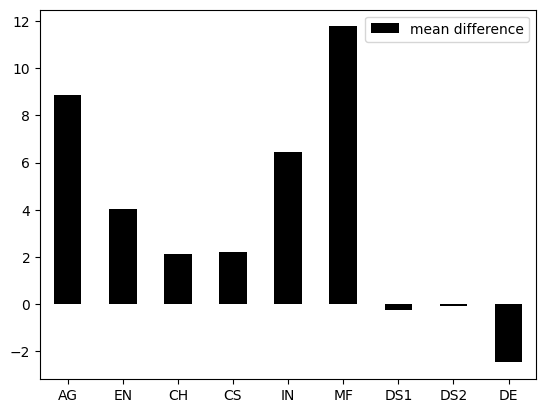

In [15]:
val2=[8.87,	4.03,	2.13,	2.23,	6.45,	11.77,	-0.25,	-0.08,	-2.47]
ind2 =['AG',	'EN',	'CH'	,'CS'	,'IN'	,'MF'	,'DS1',	'DS2',	'DE']
df2 = pd.DataFrame({'mean difference': val2}, index=ind2)
df2.plot.bar(rot=0, color='black')
